https://m.yna.co.kr/view/AKR20170410169000017

In [ ]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [ ]:
import pandas as pd

일반 담배 합산

In [ ]:
url= 'https://m.yna.co.kr/view/AKR20170410169000017'
driver.get(url)

reTitles= ['구분', '성분명', '함량 단위', '(국내 제품)- ISO', '(국내 제품)- HC']

contents= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[1]/tbody')
contents= contents.text
contents = contents.splitlines()
n= len(contents)

elements = [[None, None, None, None, None] for _ in range(n-2)]

# 구분, 성분명, 함량 단위
for i in range(2, n):
  a= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[1]/tbody/tr[' + str(i+1) + ']/td[1]')

  if a.get_attribute('rowspan'): # 첫 번째 열이 rowspan이면
    row1Value= int(a.get_attribute('rowspan')) # 첫 번째 그룹(2, 7)
    b= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[1]/tbody/tr[' + str(i+1) + ']/td[2]') # (col2, row2)
    cnt1, cnt2= 0, 0
    if b.get_attribute('rowspan'): # 나프탈 아민
      col2Value= int(b.get_attribute('rowspan')) # 두 번째 그룹
      for j in range(col2Value):
        elements[i-2+j][0]=b.text
      c= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[1]/tbody/tr[' + str(i+1) + ']/td[3]').text
      elements[i-2][1], elements[i-2][2]=c[:c.index('(')], c[c.index('(')+1: c.index(')')]
      cnt1+=1
    elif b.get_attribute('colspan'): # 니코틴
      b= b.text
      elements[i-2][0],elements[i-2][1], elements[i-2][2]=b[:b.index('(')], b[:b.index('(')],b[b.index('(')+1: b.index(')')]
      cnt2+=1
  elif a.get_attribute('colspan'):
    if cnt2 == row1Value:
      continue
    cnt2+=1
    a= a.text
    elements[i-2][0],elements[i-2][1], elements[i-2][2] =a[:a.index('(')], a[:a.index('(')], a[a.index('(')+1: a.index(')')]
  else:
    if cnt1 == col2Value:
      continue
    cnt1+=1
    a= a.text
    elements[i-2][1], elements[i-2][2] =a[:a.index('(')], a[a.index('(')+1: a.index(')')]


# (국내 제품)- ISO, (국내 제품)- HC
for i in range(2, n):
  elements[i-2][3]=driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[1]/tbody/tr[' + str(i+1) + ']/td[last()-1]').text
  elements[i-2][4]=driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[1]/tbody/tr[' + str(i+1) + ']/td[last()]').text

re1Df= pd.DataFrame(elements, columns= reTitles) # 궐련 담배
re1Df

,구분,성분명,함량 단위,(국내 제품)- ISO,(국내 제품)- HC
0,니코틴,니코틴,mg/cig,0.4 - 0.5,1.0 - 1.5
1,타르,타르,mg/cig,4.3 - 5.8,11.1 - 18.1
2,나프틸아민,1-아미노나프탈렌,μg/cig,0.0056 - 0.0095,0.0124 -0.0192
3,나프틸아민,2-아미노나프탈렌,μg/cig,0.0020 - 0.0043,0.0037 -0.0065
4,벤젠,벤젠,μg/cig,13.0 - 23.8,36.8 - 63.5
5,비닐크롤라이드,비닐크롤라이드,μg/cig,NQ,NQ
6,비소,비소,μg/cig,NQ,NQ
7,카드뮴,카드뮴,μg/cig,NQ,NQ
8,니켈,니켈,μg/cig,NQ,NQ


In [ ]:
contents2= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[2]/tbody')
contents2= contents2.text
contents2 = contents2.splitlines()
n2= len(contents2) # 40

elements = [[None, None, None, None, None] for _ in range(n2-4)]

for i in range(2, n2-2):
  a= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[2]/tbody/tr[' + str(i+1) + ']/td[1]')
  if a.get_attribute('colspan'):
    a=a.text
    elements[i-2][0],elements[i-2][1], elements[i-2][2]= a[:a.index('(')], a[:a.index('(')], a[a.index('(')+1: a.index(')')]
  elif a.get_attribute('rowspan'):
    rowValue= int(a.get_attribute('rowspan')) # 8
    b= driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[2]/tbody/tr[' + str(i+1) + ']/td[2]').text
    for j in range(rowValue):
      elements[i-2+j][0]= a.text
    elements[i-2][1], elements[i-2][2]=  b[:b.index('(')],b[b.index('(')+1: b.index(')')]
    cnt=0
  else:
    if cnt==rowValue:
      continue
    cnt+=1
    a=a.text
    elements[i-2][1], elements[i-2][2]= a[:a.index('(')], a[a.index('(')+1: a.index(')')]

# (국내 제품)- ISO, (국내 제품)- HC
for i in range(2, n2-2):
  elements[i-2][3]=driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[2]/tbody/tr[' + str(i+1) + ']/td[last()-1]').text
  elements[i-2][4]=driver.find_element('xpath', '//*[@id="articleWrap"]/div/table[2]/tbody/tr[' + str(i+1) + ']/td[last()]').text

re2Df= pd.DataFrame(elements, columns= reTitles)
re2Df

,구분,성분명,함량 단위,(국내 제품)- ISO,(국내 제품)- HC
0,일산화탄소,일산화탄소,mg/cig,3.7 - 7.5,16.2 - 20.5
1,카르보닐류,포름알데히드,μg/cig,8.2 - 14.3,25.5 - 54.2
2,카르보닐류,아세트알데히드,μg/cig,224.7 - 327.2,594.9 - 864.7
3,카르보닐류,아크롤레인,μg/cig,8.8 - 11.4,33.1 - 40.2
4,카르보닐류,크로톤알데히드,μg/cig,NQ,26.5 - 29.0
5,카르보닐류,아세톤,μg/cig,104.5 - 127.4,241.6 - 320.2
6,카르보닐류,프로피오알데히드,μg/cig,17.4 - 25.7,49.1 - 72.4
7,카르보닐류,메틸에틸케톤,μg/cig,19.6 - 24.1,62.0 - 94.6
8,카르보닐류,부틸알데히드,μg/cig,13.8 - 19.5,43.9 - 60.2
9,페놀류,카테콜,μg/cig,47.0 - 80.5,117.5 - 184.7


In [ ]:
re1Df['(국내 제품)- ISO']= re1Df['(국내 제품)- ISO'].str.replace('NQ', '0')
re1Df['(국내 제품)- HC']= re1Df['(국내 제품)- HC'].str.replace('NQ', '0')
re1Df

,구분,성분명,함량 단위,(국내 제품)- ISO,(국내 제품)- HC
0,니코틴,니코틴,mg/cig,0.4 - 0.5,1.0 - 1.5
1,타르,타르,mg/cig,4.3 - 5.8,11.1 - 18.1
2,나프틸아민,1-아미노나프탈렌,μg/cig,0.0056 - 0.0095,0.0124 -0.0192
3,나프틸아민,2-아미노나프탈렌,μg/cig,0.0020 - 0.0043,0.0037 -0.0065
4,벤젠,벤젠,μg/cig,13.0 - 23.8,36.8 - 63.5
5,비닐크롤라이드,비닐크롤라이드,μg/cig,0,0
6,비소,비소,μg/cig,0,0
7,카드뮴,카드뮴,μg/cig,0,0
8,니켈,니켈,μg/cig,0,0


In [ ]:
re2Df['구분']= re2Df['구분'].str.replace('\n', ' ')
re2Df['(국내 제품)- ISO']= re2Df['(국내 제품)- ISO'].str.replace('NQ', '0')
re2Df['(국내 제품)- HC']= re2Df['(국내 제품)- HC'].str.replace('NQ', '0')
re2Df

,구분,성분명,함량 단위,(국내 제품)- ISO,(국내 제품)- HC
0,일산화탄소,일산화탄소,mg/cig,3.7 - 7.5,16.2 - 20.5
1,카르보닐류,포름알데히드,μg/cig,8.2 - 14.3,25.5 - 54.2
2,카르보닐류,아세트알데히드,μg/cig,224.7 - 327.2,594.9 - 864.7
3,카르보닐류,아크롤레인,μg/cig,8.8 - 11.4,33.1 - 40.2
4,카르보닐류,크로톤알데히드,μg/cig,0,26.5 - 29.0
5,카르보닐류,아세톤,μg/cig,104.5 - 127.4,241.6 - 320.2
6,카르보닐류,프로피오알데히드,μg/cig,17.4 - 25.7,49.1 - 72.4
7,카르보닐류,메틸에틸케톤,μg/cig,19.6 - 24.1,62.0 - 94.6
8,카르보닐류,부틸알데히드,μg/cig,13.8 - 19.5,43.9 - 60.2
9,페놀류,카테콜,μg/cig,47.0 - 80.5,117.5 - 184.7


In [ ]:
CigaretteIngredient= pd.concat([re1Df, re2Df], ignore_index=True)
CigaretteIngredient

,구분,성분명,함량 단위,(국내 제품)- ISO,(국내 제품)- HC
0,니코틴,니코틴,mg/cig,0.4 - 0.5,1.0 - 1.5
1,타르,타르,mg/cig,4.3 - 5.8,11.1 - 18.1
2,나프틸아민,1-아미노나프탈렌,μg/cig,0.0056 - 0.0095,0.0124 -0.0192
3,나프틸아민,2-아미노나프탈렌,μg/cig,0.0020 - 0.0043,0.0037 -0.0065
4,벤젠,벤젠,μg/cig,13.0 - 23.8,36.8 - 63.5
5,비닐크롤라이드,비닐크롤라이드,μg/cig,0,0
6,비소,비소,μg/cig,0,0
7,카드뮴,카드뮴,μg/cig,0,0
8,니켈,니켈,μg/cig,0,0
9,일산화탄소,일산화탄소,mg/cig,3.7 - 7.5,16.2 - 20.5


전자 담배 합산

In [ ]:
url= 'https://www.yna.co.kr/view/AKR20170410169300017'
driver.get(url)

econtents= driver.find_element('xpath', '//*[@id="articleWrap"]/div[2]/div/div/article/table/tbody')

ecTitles= ['구분', '성분명', '(액상 중)- 함량(μg/g)', '(기체상 중)- 함량(μg/g)', '(기체상 중)- 함량(μg/cig*)']
econtents= econtents.text
econtents = econtents.splitlines()
n= len(econtents)

elements = [[None, None, None, None, None] for _ in range(n-3)]

# 구분, 성분명
for i in range(3, n):
  a=driver.find_element('xpath', '//*[@id="articleWrap"]/div[2]/div/div/article/table/tbody/tr[' + str(i) + ']/td[1]')

  if a.get_attribute('colspan'):
    elements[i-3][0],elements[i-3][1]= a.text, a.text
  elif a.get_attribute('rowspan'):
    rowValue= int(a.get_attribute('rowspan'))
    elements[i-3][1]= driver.find_element('xpath', '//*[@id="articleWrap"]/div[2]/div/div/article/table/tbody/tr[' + str(i) + ']/td[2]').text
    for j in range(rowValue):
      elements[i-3+j][0]= a.text
    cnt= 0
  else:
    if cnt == rowValue:
      continue
    cnt+=1
    elements[i-3][1]=a.text


# (액상 중)- 함량(μg/g), (기체상 중)- 함량(μg/g), (기체상 중)- 함량(μg/cig*)
for i in range(3, n):
  elements[i-3][2]=driver.find_element('xpath', '//*[@id="articleWrap"]/div[2]/div/div/article/table/tbody/tr[' + str(i) + ']/td[last()-2]').text
  elements[i-3][3]=driver.find_element('xpath', '//*[@id="articleWrap"]/div[2]/div/div/article/table/tbody/tr[' + str(i) + ']/td[last()-1]').text
  elements[i-3][4]=driver.find_element('xpath', '//*[@id="articleWrap"]/div[2]/div/div/article/table/tbody/tr[' + str(i) + ']/td[last()]').text


ecDf= pd.DataFrame(elements, columns= ecTitles)
ecDf

,구분,성분명,(액상 중)- 함량(μg/g),(기체상 중)- 함량(μg/g),(기체상 중)- 함량(μg/cig*)
0,니코틴,니코틴,7000 ∼13500,6500 ∼ 12400,330 ∼ 670
1,카르보닐류,포름알데히드,NQ ∼ 26.1,NQ ∼ 85.7,NQ ∼ 4.2
2,카르보닐류,아세트알데히드,NQ ∼ 14.7,NQ ∼ 9.1,NQ ∼ 2.4
3,카르보닐류,아세톤,NQ ∼ 8.3,NQ ∼ 30.9,NQ ∼ 1.5
4,카르보닐류,아크롤레인,NQ,NQ,NQ
5,카르보닐류,프로피오알데히드,NQ ∼ 8.3,NQ ∼ 144.9,NQ ∼ 7.1
6,카르보닐류,크로톤알데히드,NQ ∼ 55.3,NQ,NQ


In [ ]:
# 2 μg/cig = 1 μg/g
ecDf['(액상 중)- 함량(μg/g)']= ecDf['(액상 중)- 함량(μg/g)'].str.replace('NQ', '0')
ecDf['(기체상 중)- 함량(μg/g)']= ecDf['(기체상 중)- 함량(μg/g)'].str.replace('NQ', '0')
ecDf['(기체상 중)- 함량(μg/cig*)']= ecDf['(기체상 중)- 함량(μg/cig*)'].str.replace('NQ', '0')

ElectricIngredient= ecDf.drop(ecDf.columns[3], axis=1) # ug/g drop
unitColumn=['μg/cig' for _ in range(len(ecDf))]
ElectricIngredient.insert(2, '함량 단위', unitColumn) # 함량 단위 들여오기
ElectricIngredient = ElectricIngredient.rename(columns={'(액상 중)- 함량(μg/g)': '액상 중', '(기체상 중)- 함량(μg/cig*)': '기체상 중'})

ElectricIngredient

,구분,성분명,함량 단위,액상 중,기체상 중
0,니코틴,니코틴,μg/cig,7000 ∼13500,330 ∼ 670
1,카르보닐류,포름알데히드,μg/cig,0 ∼ 26.1,0 ∼ 4.2
2,카르보닐류,아세트알데히드,μg/cig,0 ∼ 14.7,0 ∼ 2.4
3,카르보닐류,아세톤,μg/cig,0 ∼ 8.3,0 ∼ 1.5
4,카르보닐류,아크롤레인,μg/cig,0,0
5,카르보닐류,프로피오알데히드,μg/cig,0 ∼ 8.3,0 ∼ 7.1
6,카르보닐류,크로톤알데히드,μg/cig,0 ∼ 55.3,0


In [ ]:
import re

def double_range_values(range_str):
    match = re.match(r'([\d.]+)\s*∼\s*([\d.]+)', range_str)
    if match:
        start, end = map(float, match.groups())
        new_start = start * 2
        new_end = end * 2

        if new_start.is_integer():
            new_start = int(new_start)
        if new_end.is_integer():
            new_end = int(new_end)

        return f'{new_start:g} - {new_end:g}'
    return range_str

def changeRange(range_str):
  match = re.match(r'([\d.]+)\s*∼\s*([\d.]+)', range_str)
  if match:
      start, end = map(float, match.groups())

      if start.is_integer():
          start = int(start)
      if end.is_integer():
          end = int(end)

      return f'{start:g} - {end:g}'
  return range_str

ElectricIngredient['액상 중'] = ElectricIngredient['액상 중'].apply(double_range_values)
ElectricIngredient['기체상 중']= ElectricIngredient['기체상 중'].apply(changeRange)
ElectricIngredient

,구분,성분명,함량 단위,액상 중,기체상 중
0,니코틴,니코틴,μg/cig,14000 - 27000,330 - 670
1,카르보닐류,포름알데히드,μg/cig,0 - 52.2,0 - 4.2
2,카르보닐류,아세트알데히드,μg/cig,0 - 29.4,0 - 2.4
3,카르보닐류,아세톤,μg/cig,0 - 16.6,0 - 1.5
4,카르보닐류,아크롤레인,μg/cig,0,0
5,카르보닐류,프로피오알데히드,μg/cig,0 - 16.6,0 - 7.1
6,카르보닐류,크로톤알데히드,μg/cig,0 - 110.6,0


In [ ]:
# csv로 추출
CigaretteIngredient.to_csv('CigaretteIngredient.csv', index= False)
ElectricIngredient.to_csv('ElectricIngredient.csv', index=False)

데이터프레임 -> {}로 바꾸기

In [ ]:
# 일반 담배
# {'니코틴' : {'니코틴': (min, max)} , ...} # HC기준
# mg -> ug로 바꾸기

def split_range(value):
    if '-' in value:
        min_str, max_str = map(str.strip, value.split('-'))
        min_value, max_value = map(float, [min_str, max_str])
    else:
        min_value = max_value = float(value)
    return min_value, max_value

# B열의 값을 분할하여 min과 max값으로 나누고, 딕셔너리로 변환하는 함수
def create_dict(row):
    if row['(국내 제품)- HC'] == '0':
        return {row['성분명']: (0, 0)}
    elif '-' in row['(국내 제품)- HC']:
        min_value, max_value = split_range(row['(국내 제품)- HC'])
        return {row['성분명']: (min_value, max_value)}
    else:
        return {row['성분명']: None}  # 범위가 없는 경우 None으로 처리

cigarette_dict= {}

for _, row in CigaretteIngredient.iterrows():
  group_name= row['구분']
  component_name= row['성분명']
  component_dict= create_dict(row)
  if group_name not in cigarette_dict:
        cigarette_dict[group_name] = {}
  cigarette_dict[group_name].update(component_dict)


def multiply_values(data):
    for key, value in data.items():
        if key in ['니코틴', '타르']:  # '니코틴'과 '타르' 키에 해당하는 값만 처리
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    data[key][sub_key] = tuple(int(1000 * v) for v in sub_value)

multiply_values(cigarette_dict)
print(cigarette_dict)

{'니코틴': {'니코틴': (1000, 1500)}, '타르': {'타르': (11100, 18100)}, '나프틸아민': {'1-아미노나프탈렌': (0.0124, 0.0192), '2-아미노나프탈렌': (0.0037, 0.0065)}, '벤젠': {'벤젠': (36.8, 63.5)}, '비닐크롤라이드': {'비닐크롤라이드': (0, 0)}, '비소': {'비소': (0, 0)}, '카드뮴': {'카드뮴': (0, 0)}, '니켈': {'니켈': (0, 0)}, '일산화탄소': {'일산화탄소': (16.2, 20.5)}, '카르보닐류': {'포름알데히드': (25.5, 54.2), '아세트알데히드': (594.9, 864.7), '아크롤레인': (33.1, 40.2), '크로톤알데히드': (26.5, 29.0), '아세톤': (241.6, 320.2), '프로피오알데히드': (49.1, 72.4), '메틸에틸케톤': (62.0, 94.6), '부틸알데히드': (43.9, 60.2)}, '페놀류': {'카테콜': (117.5, 184.7), '하이드로퀴논': (36.3, 54.2), '레소르시놀': (0.0, 9.4), '페놀': (12.6, 28.8), 'm+p-크레졸': (4.5, 8.8), 'o-크레졸': (0.0, 6.9)}, '중간 휘발성 유기화합물': {'스티렌': (5.3, 7.8), '피리딘': (6.2, 10.9), '퀴놀린': (0, 0)}, '시안화수소': {'시안화수소': (47.0, 85.3)}, '휘발성유기 화합물류': {'1,3-부타디엔': (44.7, 72.1), '이소프렌': (221.0, 377.0), '아크릴로니트릴': (6.8, 12.3), '톨루엔': (86.2, 113.0)}, '암모니아': {'암모니아': (20.2, 24.6)}, '산화질소': {'산화질소': (254.4, 471.4)}, '방향족 아민류': {'4-아미노비페닐': (0.0024, 0.0035), '3-아미노비페닐': (0.0067, 0.01)}, '

In [ ]:
# 전자 담배
# {'니코틴': ['니코틴': (액상 중 min, 액상 중 max), (기체상 중 min, 기체상 중 max)]}

# 액상 중과 기체상 중의 값을 분할하여 min과 max값을 추출하는 함수
def split_range(value):
    if '-' in value:
        min_str, max_str = map(str.strip, value.split('-'))
        min_value, max_value = map(float, [min_str, max_str])
    else:
        min_value = max_value = float(value)
    return min_value, max_value

# 데이터프레임을 딕셔너리로 변환하는 함수
def create_dict(df):
    result_dict = {}
    for _, row in df.iterrows():
        group_name = row['구분']
        component_name = row['성분명']

        if group_name not in result_dict:
            result_dict[group_name] = {}

        if component_name not in result_dict[group_name]:
            result_dict[group_name][component_name] = []

        liquid_min, liquid_max = split_range(row['액상 중'])
        gas_min, gas_max = split_range(row['기체상 중'])

        result_dict[group_name][component_name].append((liquid_min, liquid_max))
        result_dict[group_name][component_name].append((gas_min, gas_max))
    return result_dict

electric_dict = create_dict(ElectricIngredient)
print(electric_dict)


{'니코틴': {'니코틴': [(14000.0, 27000.0), (330.0, 670.0)]}, '카르보닐류': {'포름알데히드': [(0.0, 52.2), (0.0, 4.2)], '아세트알데히드': [(0.0, 29.4), (0.0, 2.4)], '아세톤': [(0.0, 16.6), (0.0, 1.5)], '아크롤레인': [(0.0, 0.0), (0.0, 0.0)], '프로피오알데히드': [(0.0, 16.6), (0.0, 7.1)], '크로톤알데히드': [(0.0, 110.6), (0.0, 0.0)]}}


일반 담배의 성분 그래프

In [ ]:
def calculate_averages(data):
    averages = []
    for group_name, group_data in data.items():
        for component_name, values in group_data.items():
            avg_value = sum(values) / len(values)  # 성분명에 해당하는 값들의 평균 계산
            averages.append((component_name, avg_value))  # 성분명과 평균값을 튜플로 추가
    return averages

# 함수를 호출하여 평균값을 계산하고 2차원 배열로 반환
cigarette_avg = calculate_averages(cigarette_dict)
print(cigarette_avg)

[('니코틴', 1250.0), ('타르', 14600.0), ('1-아미노나프탈렌', 0.015799999999999998), ('2-아미노나프탈렌', 0.0051), ('벤젠', 50.15), ('비닐크롤라이드', 0.0), ('비소', 0.0), ('카드뮴', 0.0), ('니켈', 0.0), ('일산화탄소', 18.35), ('포름알데히드', 39.85), ('아세트알데히드', 729.8), ('아크롤레인', 36.650000000000006), ('크로톤알데히드', 27.75), ('아세톤', 280.9), ('프로피오알데히드', 60.75), ('메틸에틸케톤', 78.3), ('부틸알데히드', 52.05), ('카테콜', 151.1), ('하이드로퀴논', 45.25), ('레소르시놀', 4.7), ('페놀', 20.7), ('m+p-크레졸', 6.65), ('o-크레졸', 3.45), ('스티렌', 6.55), ('피리딘', 8.55), ('퀴놀린', 0.0), ('시안화수소', 66.15), ('1,3-부타디엔', 58.4), ('이소프렌', 299.0), ('아크릴로니트릴', 9.55), ('톨루엔', 99.6), ('암모니아', 22.4), ('산화질소', 362.9), ('4-아미노비페닐', 0.00295), ('3-아미노비페닐', 0.00835), ('벤조피렌', 0.00635), ('NNN', 0.0), ('NNK', 0.0), ('NAB', 0.0), ('NAT', 0.0), ('납', 0.0), ('크롬', 0.0), ('수은', 0.0), ('셀레늄', 0.0)]


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

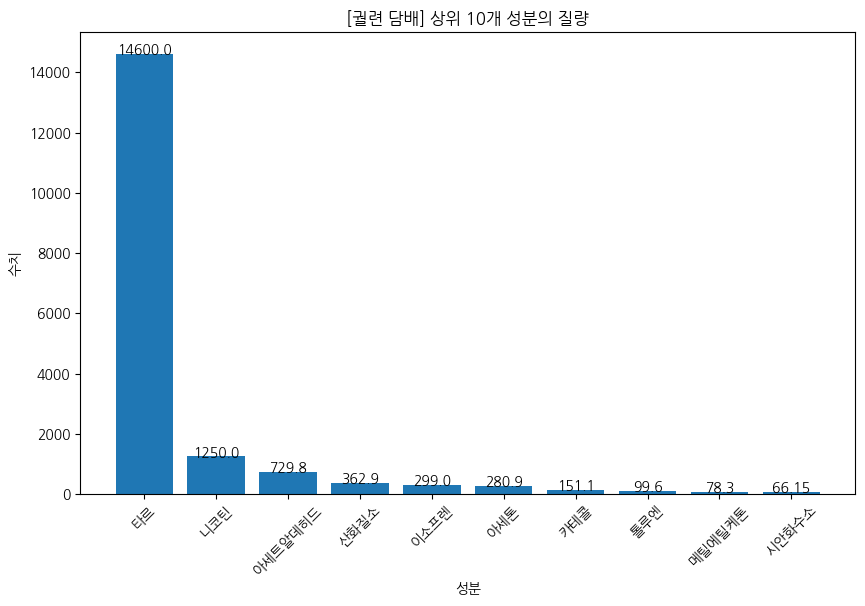

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


plt.rc('font', family= 'NanumGothic')
plt.rcParams['axes.unicode_minus']= False


top_10_data = sorted(cigarette_avg, key=lambda x: x[1], reverse=True)[:10]

# 성분명과 수치 추출
components = [name for name, _ in top_10_data]
values = [value for _, value in top_10_data]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(components, values)
plt.xlabel('성분')
plt.ylabel('수치')
plt.title('[궐련 담배] 상위 10개 성분의 질량')
plt.xticks(rotation=45)  # x축 레이블 회전
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center')  # 막대 위에 수치 표시
plt.show()


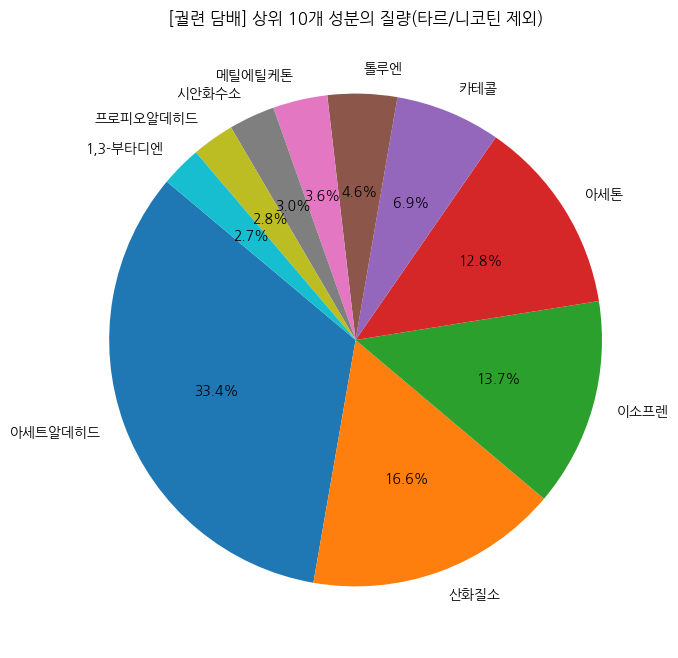

In [ ]:
nottopdata = sorted(cigarette_avg, key=lambda x: x[1], reverse=True)[2:12]

# 평균값들의 총합 계산
total = sum(value for _, value in nottopdata)

# 각 평균값을 전체의 비율로 계산
ratios = [value / total for _, value in nottopdata]

# 성분명과 비율을 이용하여 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(ratios, labels=[name for name, _ in nottopdata], autopct='%1.1f%%', startangle=140)
plt.title('[궐련 담배] 상위 10개 성분의 질량(타르/니코틴 제외)')
plt.show()

전자담배의 성분 그래프

In [ ]:
liquid_avg = []  # 튜플1의 평균을 저장할 리스트
gas_avg = []  # 튜플2의 평균을 저장할 리스트

# 데이터를 순회하면서 평균을 구하고 새로운 리스트에 저장
for group_name, group_data in electric_dict.items():
    for component_name, tuples in group_data.items():
        for i, tup in enumerate(tuples):
            avg = sum(tup) / len(tup)  # 튜플의 평균 계산
            if i == 0:
                liquid_avg.append([component_name, avg])
            elif i == 1:
                gas_avg.append([component_name, avg])

print(liquid_avg)
print(gas_avg)

[['니코틴', 20500.0], ['포름알데히드', 26.1], ['아세트알데히드', 14.7], ['아세톤', 8.3], ['아크롤레인', 0.0], ['프로피오알데히드', 8.3], ['크로톤알데히드', 55.3]]
[['니코틴', 500.0], ['포름알데히드', 2.1], ['아세트알데히드', 1.2], ['아세톤', 0.75], ['아크롤레인', 0.0], ['프로피오알데히드', 3.55], ['크로톤알데히드', 0.0]]


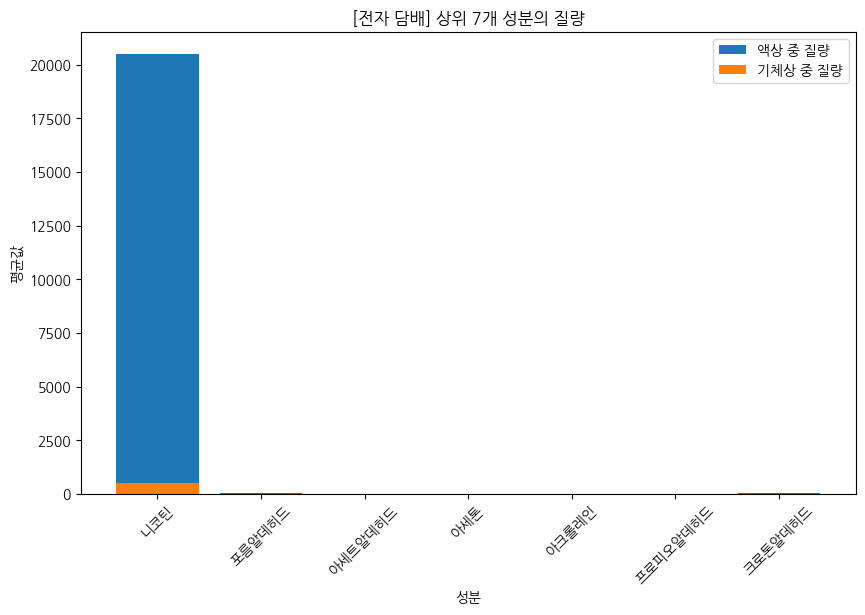

In [ ]:
# # 전자담배
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family= 'NanumGothic')
plt.rcParams['axes.unicode_minus']= False


# 리스트에서 성분명과 수치 추출
components1 = [name for name, _ in liquid_avg]
values1 = [value for _, value in liquid_avg]

components2 = [name for name, _ in gas_avg]
values2 = [value for _, value in gas_avg]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 리스트1의 막대 그래프
plt.bar(components1, values1, label='액상 중 질량')

# 리스트2의 막대 그래프
plt.bar(components2, values2, label='기체상 중 질량')

plt.xlabel('성분')
plt.ylabel('평균값')
plt.title('[전자 담배] 상위 7개 성분의 질량')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend()
plt.show()

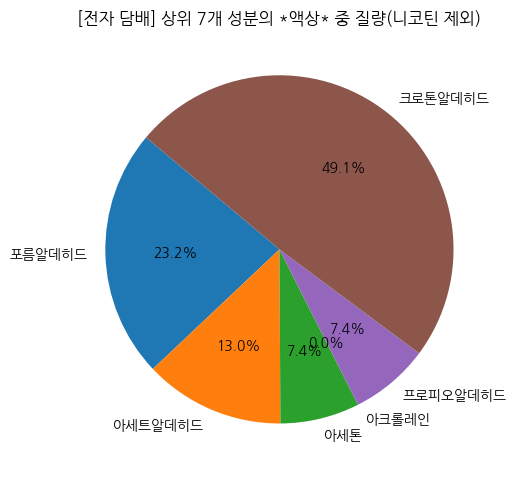

In [ ]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 리스트1의 원형 그래프 (2위부터 마지막 순위까지)
plt.subplot(1, 2, 1)  # 서브 플롯 생성
plt.pie(values1[1:], labels=components1[1:], autopct='%1.1f%%', startangle=140)
plt.title('[전자 담배] 상위 7개 성분의 *액상* 중 질량(니코틴 제외)')

plt.tight_layout()  # 서브 플롯간 간격 조정
plt.show()

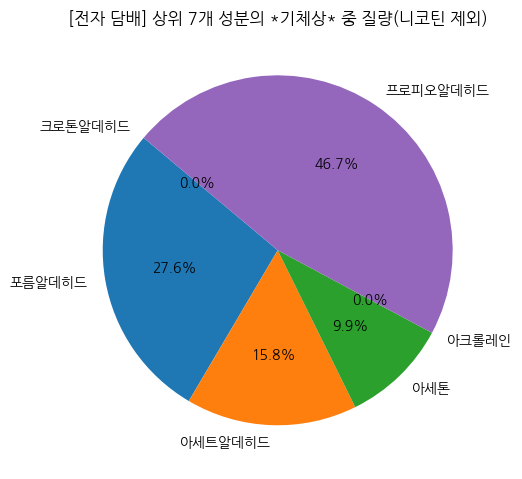

In [ ]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 리스트2의 원형 그래프 (2위부터 마지막 순위까지)
plt.subplot(1, 2, 2)  # 서브 플롯 생성
plt.pie(values2[1:], labels=components2[1:], autopct='%1.1f%%', startangle=140)
plt.title('[전자 담배] 상위 7개 성분의 *기체상* 중 질량(니코틴 제외)')

plt.tight_layout()  # 서브 플롯간 간격 조정
plt.show()